# Feature extraction


## Manual feature extraction I
You want to compare prices for specific products between stores. The features in the pre-loaded dataset sales_df are: storeID, product, quantity and revenue. The quantity and revenue features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.

### init: 1 dataframe

In [2]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(sales_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'sales_df.csv': 'https://file.io/y6QZfD'}}"
prefix='data_from_datacamp/Chap4-Exercise1.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

In [3]:
import pandas as pd
sales_df=pd.read_csv(prefix+'sales_df.csv',index_col=0)

### code

In [4]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df.revenue/sales_df.quantity

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


## Manual feature extraction II
You're working on a variant of the ANSUR dataset, height_df, where a person's height was measured 3 times. Add a feature with the mean height to the dataset and then drop the 3 original features.

### init: 1 dataframe

In [5]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(height_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'height_df.csv': 'https://file.io/k8EjlP'}}"
prefix='data_from_datacamp/Chap4-Exercise1.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

In [6]:
import pandas as pd
height_df=pd.read_csv(prefix+'height_df.csv',index_col=0)

### code

In [7]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

print(reduced_df.head())

   weight_kg    height
0       81.5  1.793333
1       72.6  1.696667
2       92.9  1.740000
3       79.4  1.670000
4       94.6  1.913333


# PCA Principal Component Analysis

## Calculating Principal Components
You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's pairplot(). This will allow you to inspect the pairwise correlations between the features.

The data has been pre-loaded for you as ansur_df.

### init: 1 dataframe, seaborn

In [8]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(ansur_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'ansur_df.csv': 'https://file.io/TWpbfS'}}"
prefix='data_from_datacamp/Chap4-Exercise2.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

In [9]:
import pandas as pd
ansur_df=pd.read_csv(prefix+'ansur_df.csv',index_col=0)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

### code

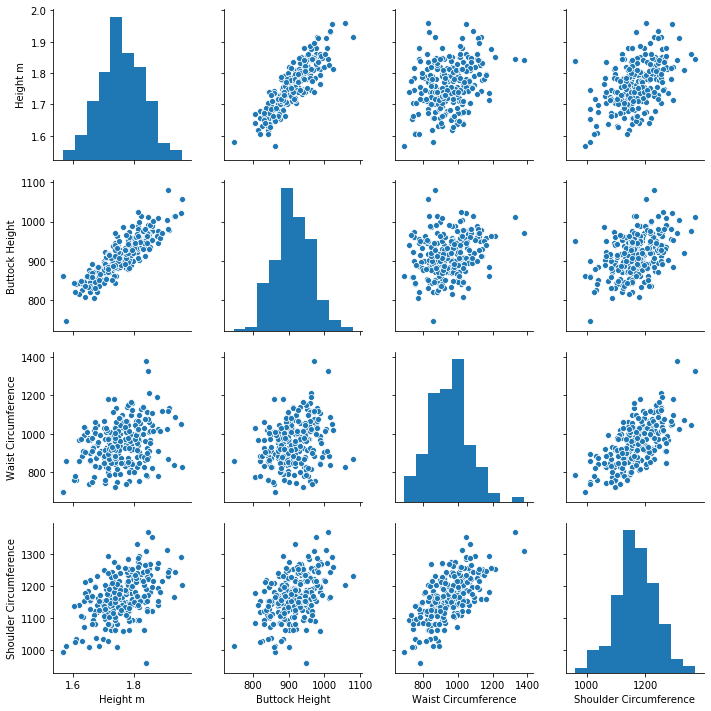

In [11]:
# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

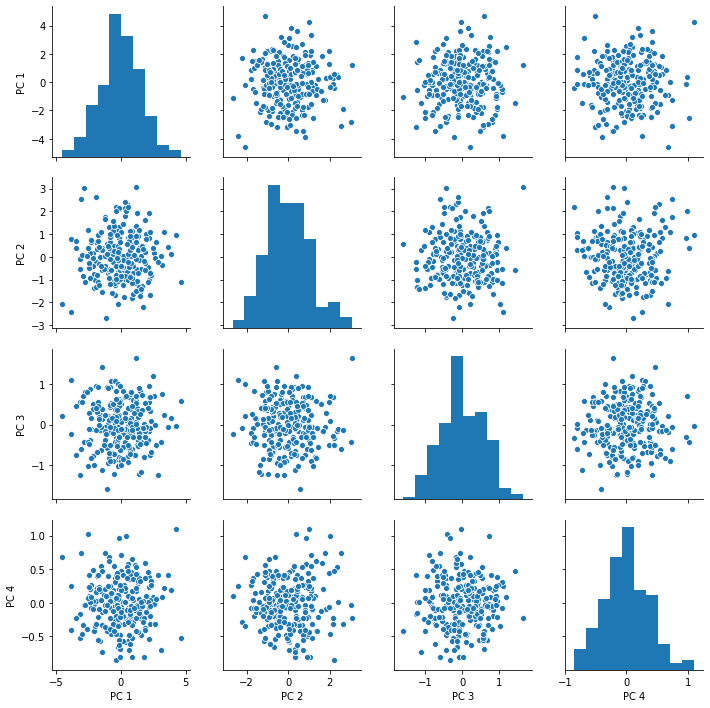

In [14]:
# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)

plt.show()

## PCA on a larger dataset
You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as ansur_df. The fitted model will be used in the next exercise. Since we are not using the principal components themselves there is no need to transform the data, instead, it is sufficient to fit pca to the data.

### init: 1 dataframe

In [15]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(ansur_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'ansur_df.csv': 'https://file.io/sZpbJi'}}"
prefix='data_from_datacamp/Chap4-Exercise2.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

In [16]:
import pandas as pd
ansur_df=pd.read_csv(prefix+'ansur_df.csv',index_col=0)

### code

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## PCA explained variance
You'll be inspecting the variance explained by the different principal components of the pca instance you created in the previous exercise.

### code

Print the explained variance ratio per principal component.


In [18]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[0.61449404 0.19893965 0.06803095 0.03770499 0.03031502 0.0171759
 0.01072762 0.00656681 0.00634743 0.00436015 0.0026586  0.00202617
 0.00065268]


Print the cumulative sum of the explained variance ratio.


In [19]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.61449404 0.81343368 0.88146463 0.91916962 0.94948464 0.96666054
 0.97738816 0.98395496 0.99030239 0.99466254 0.99732115 0.99934732
 1.        ]


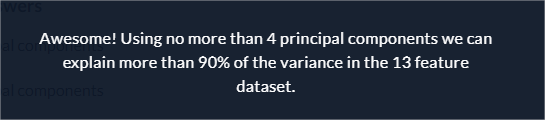

# PCA applications


## Understanding the components
You'll apply PCA to the numeric features of the Pokemon dataset, poke_df, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

### init: 1 dataframe, StandardScaler, PCA, Pipeline

In [20]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(poke_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'poke_df.csv': 'https://file.io/MA22Lp'}}"
prefix='data_from_datacamp/Chap4-Exercise3.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

In [21]:
import pandas as pd
poke_df=pd.read_csv(prefix+'poke_df.csv',index_col=0)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

### code

Build the pipeline with the scaler and PCA, set the number of components to calculate to 2.


In [23]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

Fit the pipeline to the dataset and extract the component vectors.


In [24]:
# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


## PCA for feature exploration
You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in poke_df. These categorical features (Type & Legendary) can be found in a separate dataframe poke_cat_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA())

### init: 1 dataframe, Pipeline(), StandardScaler(), PCA()

In [25]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(poke_cat_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'poke_cat_df.csv': 'https://file.io/60dFR0'}}"
prefix='data_from_datacamp/Chap4-Exercise3.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

In [26]:
import pandas as pd
poke_cat_df=pd.read_csv(prefix+'poke_cat_df.csv',index_col=0)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

### code

Fit and transform the pipeline to poke_df to extract the principal components.


In [28]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)

[[-1.5563747  -0.02148212]
 [-0.36286656 -0.05026854]
 [ 1.28015158 -0.06272022]
 ...
 [ 2.45821626 -0.51588158]
 [ 3.5303971  -0.95106516]
 [ 2.23378629  0.53762985]]


Add the 2 components to poke_cat_df.


In [29]:
# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:,0]
poke_cat_df['PC 2'] = pc[:,1]

Use the Type feature to color the PC 1 vs PC 2 scatterplot.


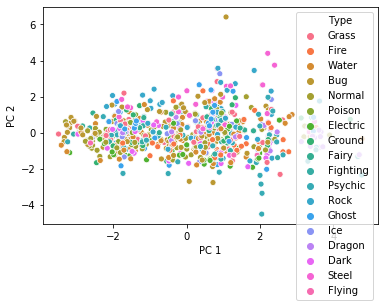

In [40]:
# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type')
plt.show()

Use the Legendary feature to color the PC 1 vs PC 2 scatterplot.


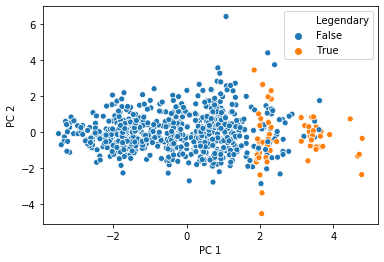

In [41]:
# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

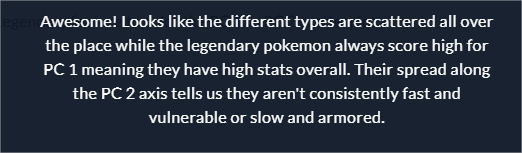

## PCA in a model pipeline
We just saw that legendary pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary pokemon based on the principal components.

The data has been pre-loaded for you and split into training and tests datasets: X_train, X_test, y_train, y_test.

Same goes for all relevant packages and classes(Pipeline(), StandardScaler(), PCA(), RandomForestClassifier()).

### init: 2 dataframes, 2 series, Pipeline(), StandardScaler(), PCA(), RandomForestClassifier()

In [42]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X_train, X_test, y_train,  y_test)
tobedownloaded="{pandas.core.series.Series: {'y_test.csv': 'https://file.io/VIeYw8',\
  'y_train.csv': 'https://file.io/eR5Tzv'},\
 pandas.core.frame.DataFrame: {'X_test.csv': 'https://file.io/tQ9cWQ',\
  'X_train.csv': 'https://file.io/E3y9B9'}}"
prefix='data_from_datacamp/Chap4-Exercise3.3_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.series.Series: {"y_test.csv": "https://file.io/VIeYw8",  "y_train.csv": "https://file.io/eR5Tzv"}, pandas.core.frame.DataFrame: {"X_test.csv": "https://file.io/tQ9cWQ",  "X_train.csv": "https://file.io/E3y9B9"}}
{'pandas.core.series.Series': {'y_test.csv': 'https://file.io/VIeYw8', 'y_train.csv': 'https://file.io/eR5Tzv'}, 'pandas.core.frame.DataFrame': {'X_test.csv': 'https://file.io/tQ9cWQ', 'X_train.csv': 'https://file.io/E3y9B9'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2347    0  2347    0     0   4496      0 --:--:-- --:--:-- --:--:--  4504
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--

In [43]:
import pandas as pd
X_train=pd.read_csv(prefix+'X_train.csv',index_col=0)
X_test=pd.read_csv(prefix+'X_test.csv',index_col=0)
y_train=pd.read_csv(prefix+'y_train.csv',index_col=0, header=None,squeeze=True)
y_test=pd.read_csv(prefix+'y_test.csv',index_col=0, header=None,squeeze=True)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

### code

Add a scaler, PCA limited to 2 components, and random forest classifier with random_state=0 to the pipeline.

In [45]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

Fit the pipeline to the training data.


In [46]:
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_)

[0.45624044 0.17767414]


C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score the model accuracy on the test set.


In [47]:
# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

95.8% test set accuracy


Repeat the process with 3 extracted components.


In [48]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.45624044 0.17767414 0.12858833]
95.0% test set accuracy


C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


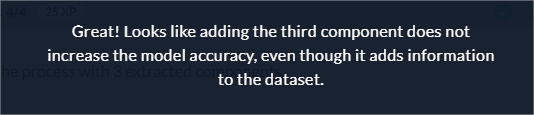

# Principal Component selection


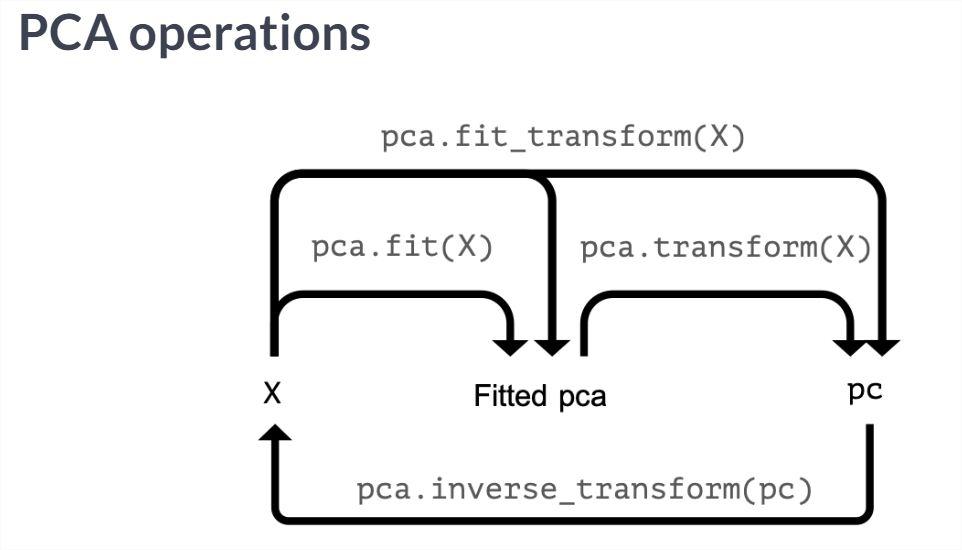

## Selecting the proportion of variance to keep
You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.

You'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded too (Pipeline(), StandardScaler(), PCA()).

### init: 1 dataframe, Pipeline(), StandardScaler(), PCA()

In [49]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(ansur_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'ansur_df.csv': 'https://file.io/DjQUYm'}}"
prefix='data_from_datacamp/Chap4-Exercise4.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"ansur_df.csv": "https://file.io/DjQUYm"}}
{'pandas.core.frame.DataFrame': {'ansur_df.csv': 'https://file.io/DjQUYm'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  789k    0  789k    0     0   433k      0 --:--:--  0:00:01 --:--:--  433k


In [50]:
import pandas as pd
ansur_df=pd.read_csv(prefix+'ansur_df.csv',index_col=0)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

### code

Pipe a scaler to PCA selecting 80% of the variance.


In [52]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

In [54]:
# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

11 components selected


Increase the proportion of variance to keep to 90%.


In [55]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

23 components selected


## Choosing the number of components
You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique. One last time, you'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).


### code

In [56]:
# Pipeline a scaler and PCA selecting 10 components
pipe = Pipeline	([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

In [57]:
# Fit the pipe to the data
pipe.fit(ansur_df)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reducer',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

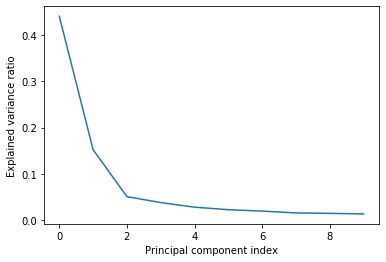

In [58]:
import matplotlib.pyplot as plt
# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

## PCA for image compression
You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.

The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array X_test. Each of the 784 pixels has a value between 0 and 255 and can be regarded as a feature.

A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as pipe. This pipeline has already been fitted to the entire MNIST dataset except for the 16 samples in X_test.

Finally, a function plot_digits has been created for you that will plot 16 images in a grid.

### init: inspect plot_digits, 1 array, 1 fitted pipeline

In [60]:
#import inspect
#print(inspect.getsource(plot_digits))
import matplotlib.pyplot as plt

def plot_digits(data):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.05, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary',
                  clim=(0, 300))
    plt.show()


In [61]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X_test)
tobedownloaded="{numpy.ndarray: {'X_test.csv': 'https://file.io/5ve97n'}}"
prefix='data_from_datacamp/Chap4-Exercise4.3_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{numpy.ndarray: {"X_test.csv": "https://file.io/5ve97n"}}
{'numpy.ndarray': {'X_test.csv': 'https://file.io/5ve97n'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 75264    0 75264    0     0  76487      0 --:--:-- --:--:-- --:--:-- 76487


In [62]:
from uploadfromdatacamp import loadNDArrayFromCsv
X_test = loadNDArrayFromCsv(prefix+'X_test.csv')

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=78))])

### code

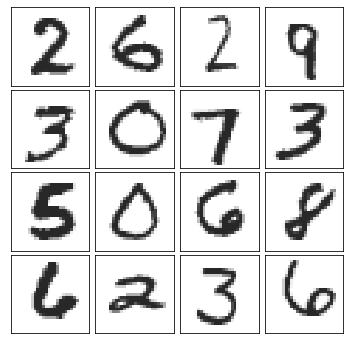

In [64]:
# Plot the MNIST sample data
plot_digits(X_test)

Transform the input data to principal components using the pipeline.


In [65]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

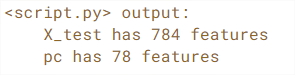

Inverse transform the components back to the original feature space.


In [ ]:
# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))

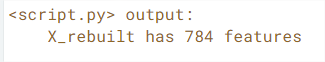

Plot the reconstructed data.


In [ ]:
plot_digits(X_rebuilt)